:

🌤️ Challenge: Weather Pattern Analysis Over Time


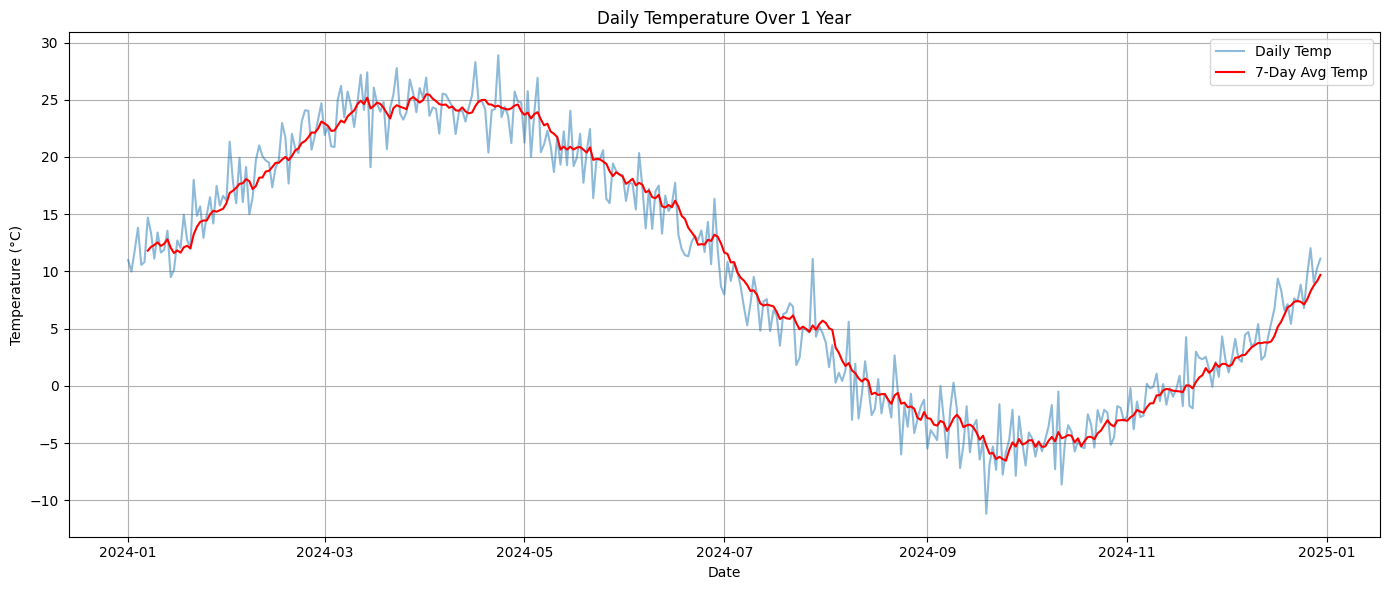

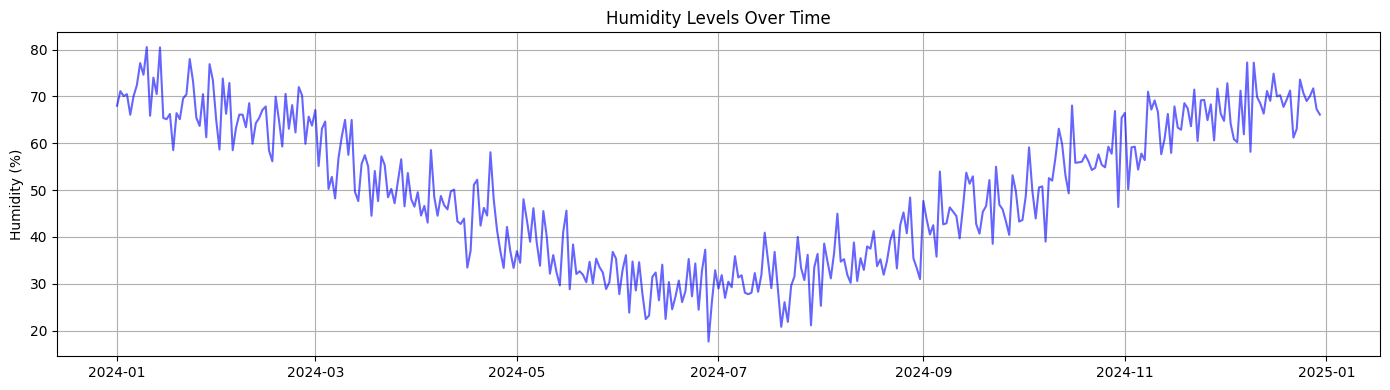

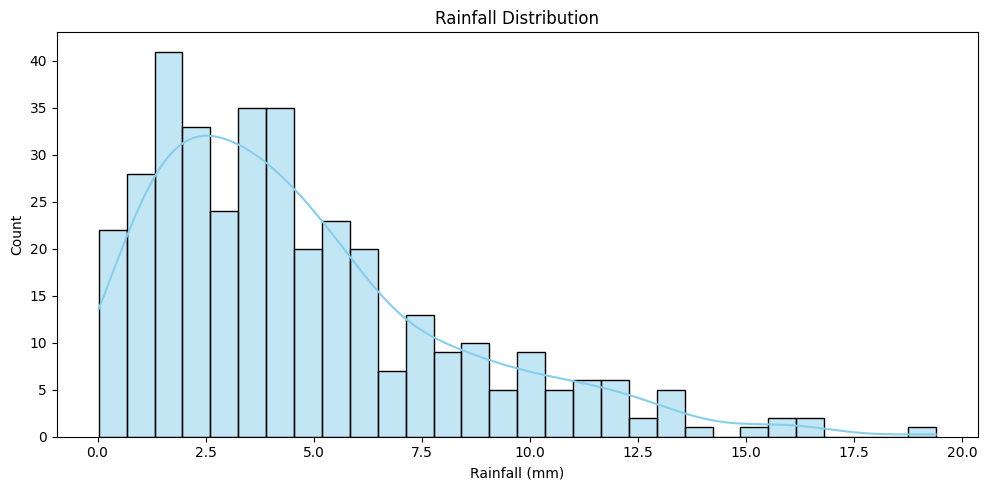

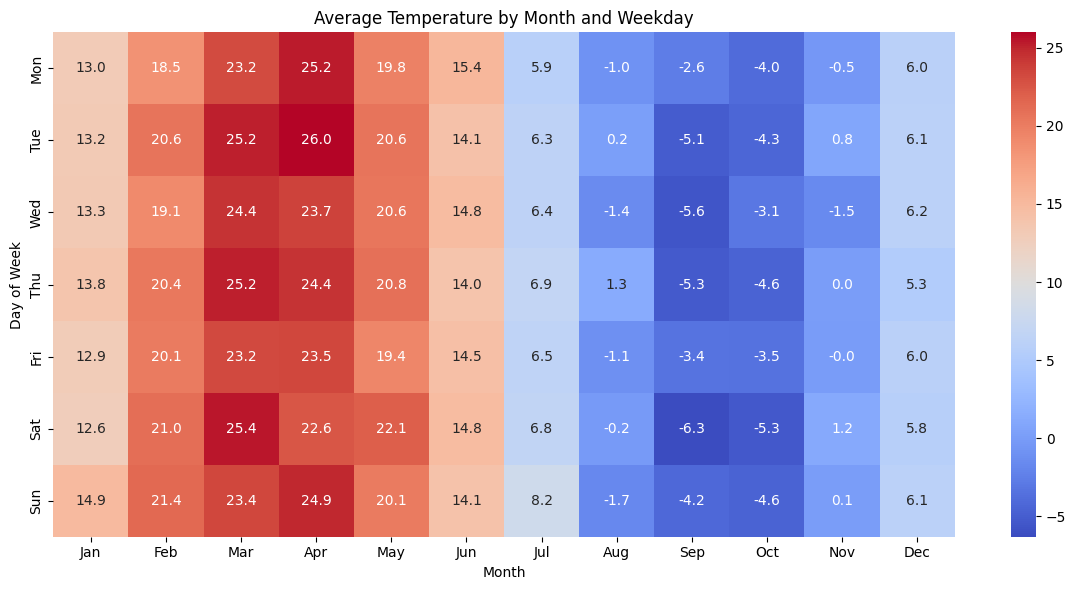

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of weather data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')

# Simulate realistic seasonal temperatures (sinusoidal pattern)
days = np.arange(365)
temperature = 10 + 15 * np.sin(2 * np.pi * days / 365) + np.random.normal(0, 2, size=365)
humidity = 50 + 20 * np.cos(2 * np.pi * days / 365) + np.random.normal(0, 5, size=365)
rainfall = np.random.gamma(shape=1.5, scale=3, size=365)  # positively skewed distribution

df_weather = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperature,
    'Humidity': humidity,
    'Rainfall': rainfall
})

df_weather['Month'] = df_weather['Date'].dt.month
df_weather['Weekday'] = df_weather['Date'].dt.dayofweek
df_weather['Temp_Rolling'] = df_weather['Temperature'].rolling(window=7).mean()

# 🌡️ Temperature Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_weather['Date'], df_weather['Temperature'], label='Daily Temp', alpha=0.5)
plt.plot(df_weather['Date'], df_weather['Temp_Rolling'], label='7-Day Avg Temp', color='red')
plt.title('Daily Temperature Over 1 Year')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 💧 Humidity Trend
plt.figure(figsize=(14, 4))
plt.plot(df_weather['Date'], df_weather['Humidity'], color='blue', alpha=0.6)
plt.title('Humidity Levels Over Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ☔ Rainfall Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_weather['Rainfall'], bins=30, kde=True, color='skyblue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

# 🔥 Heatmap - Temperature by Month and Weekday
temp_heatmap = df_weather.pivot_table(values='Temperature', index='Weekday', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(temp_heatmap, cmap='coolwarm', annot=True, fmt=".1f",
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Temperature by Month and Weekday')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()